Author: **SRISAICHARAN VELISETTI**



#  Hybrid Image 

## Overview

A hybrid image is the sum of a *low-pass filtered* version of the one image and a *high-pass filtered* version of a second image. There is a free parameter, which can be tuned for each image pair, which controls how much high frequency to remove from the first image and how much low frequency to leave in the second image. This is called the “cutoff-frequency”. In the paper it is suggested to use two cutoff frequencies (one tuned for each image) and you are free to try that, as well. In the starter code, the cutoff frequency is controlled by changing the standard deviation of the Gausian filter used in constructing the hybrid images. [This](https://drive.google.com/uc?id=187FjBJLwnYXhylx08Vdh1SAA3AO-imYv) is the sample example.


We provided 7 pairs of aligned images. The alignment is important because it affects the perceptual grouping (read the paper for details). You can create additional examples (e.g. change of expression, morph between different objects, change over time, etc.).


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

## Code

In [117]:
# helper Functions

def vis_hybrid_image(hybrid_image):
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding, num_colors), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output * 255).astype(np.uint8)
  return output

def read_image(image_path):
  image = cv2.imread(image_path)
  return image

def gaussian_2D_filter(size, cutoff_frequency):
  gauss_1_dimension = cv2.getGaussianKernel(size,cutoff_frequency)
  gauss_2_dimension = gauss_1_dimension * gauss_1_dimension.T
  return gauss_2_dimension

def imgfilter(image, filter):
  image_filter = cv2.filter2D(image, -1 , filter)
  return image_filter

def log_mag_FFT(image):
  magnitude_spectrum = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
  return magnitude_spectrum

In [118]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hybrid_image_generator(image_1,image_2,cutoff_frequency):
  filter_size = cutoff_frequency*4+1
  """cutoff_frequency is the standard deviation, in pixels, of the 
  Gaussian blur that will remove the high frequencies from one image (image_1) and 
  remove the low frequencies from another image (image_2) (to do so, subtract a blurred
  version from the original version). You will want to tune this for every image pair to get the best results."""
  filter = gaussian_2D_filter(filter_size, cutoff_frequency)
  """Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
  Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""
  blurred_image1 = imgfilter(image_1, filter)
  low_frequencies = blurred_image1
  """Remove the low frequencies from image_2. The easiest way to do this is to
  subtract a blurred version of image_2 from the original version of image_2.
  This will give you an image centered at zero with negative values."""
  blurred_image2 = imgfilter(image_2, filter)
  high_frequencies = blurred_image2 - image_2
  high_frequencies = high_frequencies.astype(np.uint8)
  """Combine the high frequencies and low frequencies to obtain hybrid_image."""
  hybrid_image= low_frequencies + high_frequencies
  """Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
  """Secondly, also visualize log magnitude of Fourier Transform of the above.
  HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""
  fft_low_freq_image = log_mag_FFT(low_frequencies)
  fft_high_freq_image = log_mag_FFT(high_frequencies)
  fft_hybrid_image = log_mag_FFT(hybrid_image)
  fft_image_1 = log_mag_FFT(image_1)
  fft_image_2 = log_mag_FFT(image_2)
  """Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
  Lastly, save all your outputs."""
  hybrid_image_scale = vis_hybrid_image(hybrid_image)
  fig, plot_array = plt.subplots(3, 4,figsize=(25, 10))
  fig.suptitle('VISUALIZATION OF Original and Filtered Images, Hybrid Image, with their FFT Magnitude and Hybrid Scale Image ', fontsize=16)
  plt.gcf().set_facecolor('white')
  plot_array[0,0].imshow(cv2.cvtColor(image_1, cv2.COLOR_RGB2BGR))
  plot_array[0,0].set_title("Image 1")
  plot_array[0,0].axis('off')
  plot_array[0,1].imshow(cv2.cvtColor(fft_image_1.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  plot_array[0,1].set_title("Fourier Transform of Image 1")
  plot_array[0,1].axis('off')
  plot_array[0,2].imshow(cv2.cvtColor(image_2, cv2.COLOR_RGB2BGR))
  plot_array[0,2].set_title("Image 2")
  plot_array[0,2].axis('off')
  plot_array[0,3].imshow(cv2.cvtColor(fft_image_2.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  plot_array[0,3].set_title("Fourier Transform of Image 2")
  plot_array[0,3].axis('off')
  plot_array[1,0].imshow(cv2.cvtColor(low_frequencies, cv2.COLOR_RGB2BGR))
  plot_array[1,0].set_title("Low Frequency of image 1")
  plot_array[1,0].axis('off')
  plot_array[1,1].imshow(cv2.cvtColor(fft_low_freq_image.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  plot_array[1,1].set_title("Fourier Transform of Low frequency image")
  plot_array[1,1].axis('off')
  plot_array[1,2].imshow(cv2.cvtColor(high_frequencies, cv2.COLOR_RGB2BGR))
  plot_array[1,2].set_title("High Frequency of image 2")
  plot_array[1,2].axis('off')
  plot_array[1,3].imshow(cv2.cvtColor(fft_high_freq_image.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  plot_array[1,3].set_title("Fourier Transform of High frequency image")
  plot_array[1,3].axis('off')
  plot_array[2,0].imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_RGB2BGR))
  plot_array[2,0].set_title("Hybrid Image")
  plot_array[2,0].axis('off')
  plot_array[2,1].imshow(cv2.cvtColor(fft_hybrid_image.astype('uint8'), cv2.COLOR_RGB2GRAY),cmap='jet')
  plot_array[2,1].set_title("Fourier Transform of Hybrid image")
  plot_array[2,1].axis('off')
  plot_array[2,2].imshow(cv2.cvtColor(hybrid_image_scale, cv2.COLOR_RGB2BGR))
  plot_array[2,2].set_title("Hybrid Image Scale")
  plot_array[2,2].axis('off')
  plot_array[2,3].set_visible(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


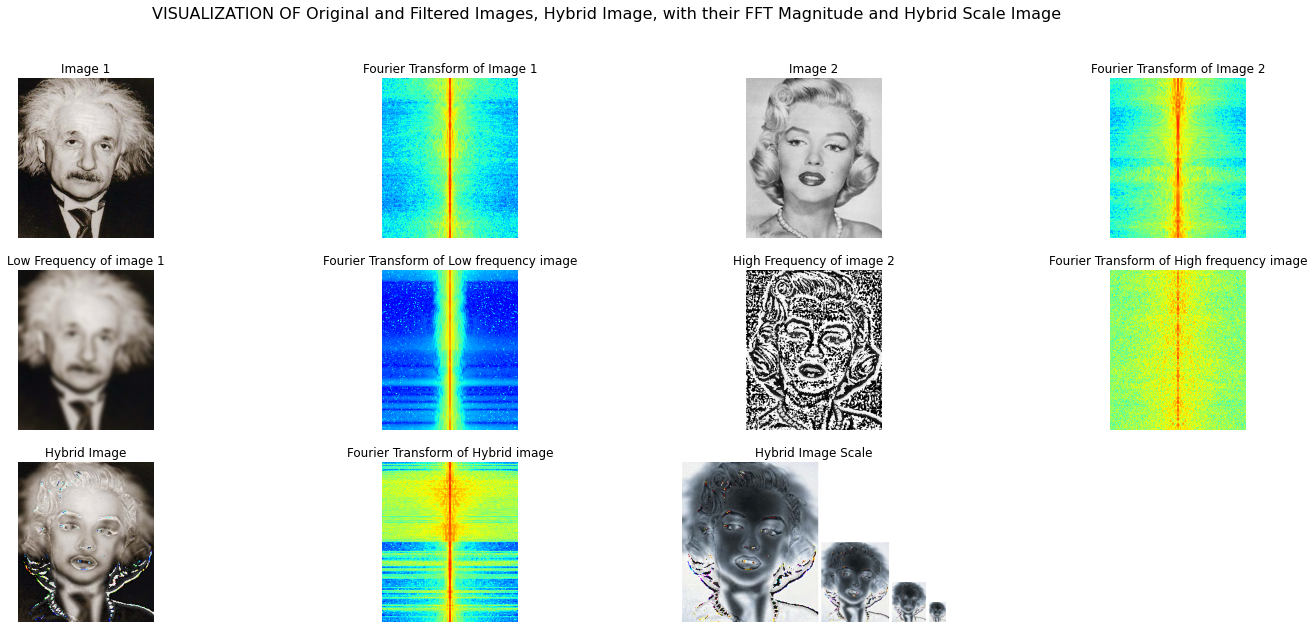

In [119]:

image_einstein = read_image("/content/data/einstein.bmp")
image_marilyn = read_image('/content/data/marilyn.bmp')
hybrid_image_generator(image_einstein,image_marilyn,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


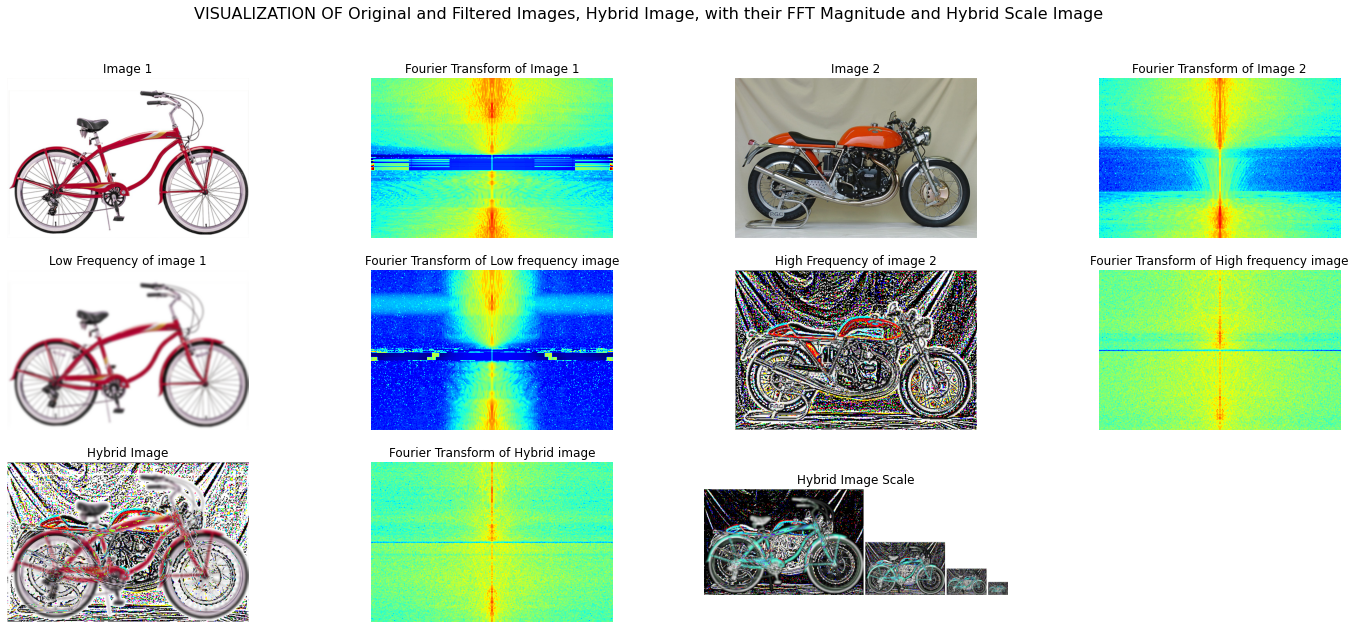

In [120]:
image_bicycle = read_image("/content/data/bicycle.bmp")
image_bike = read_image('/content/data/motorcycle.bmp')
hybrid_image_generator(image_bicycle,image_bike,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


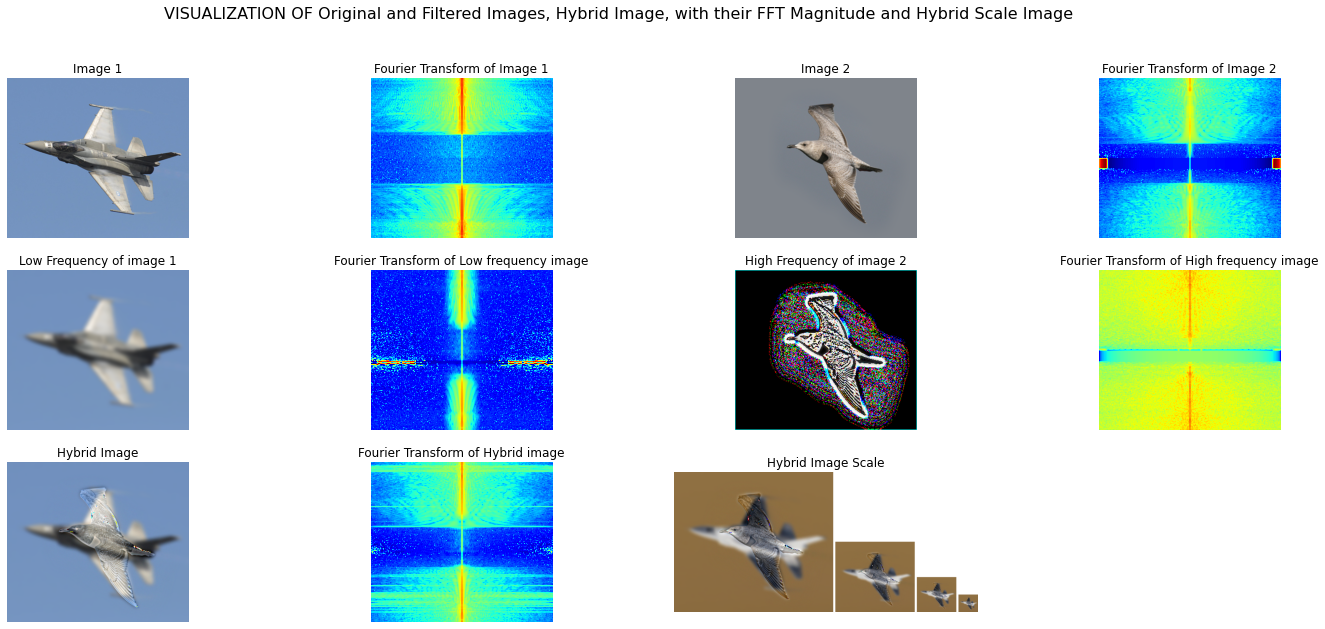

In [121]:
image_plane = read_image("/content/data/plane.bmp")
image_bird = read_image('/content/data/bird.bmp')
hybrid_image_generator(image_plane,image_bird,4)